# Explore here

In [23]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#Definimos las variables independientes(X) y la Dependiente (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]


In [12]:
#Dividimos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision del modelo: {accuracy:.2f}")

Precision del modelo: 0.75


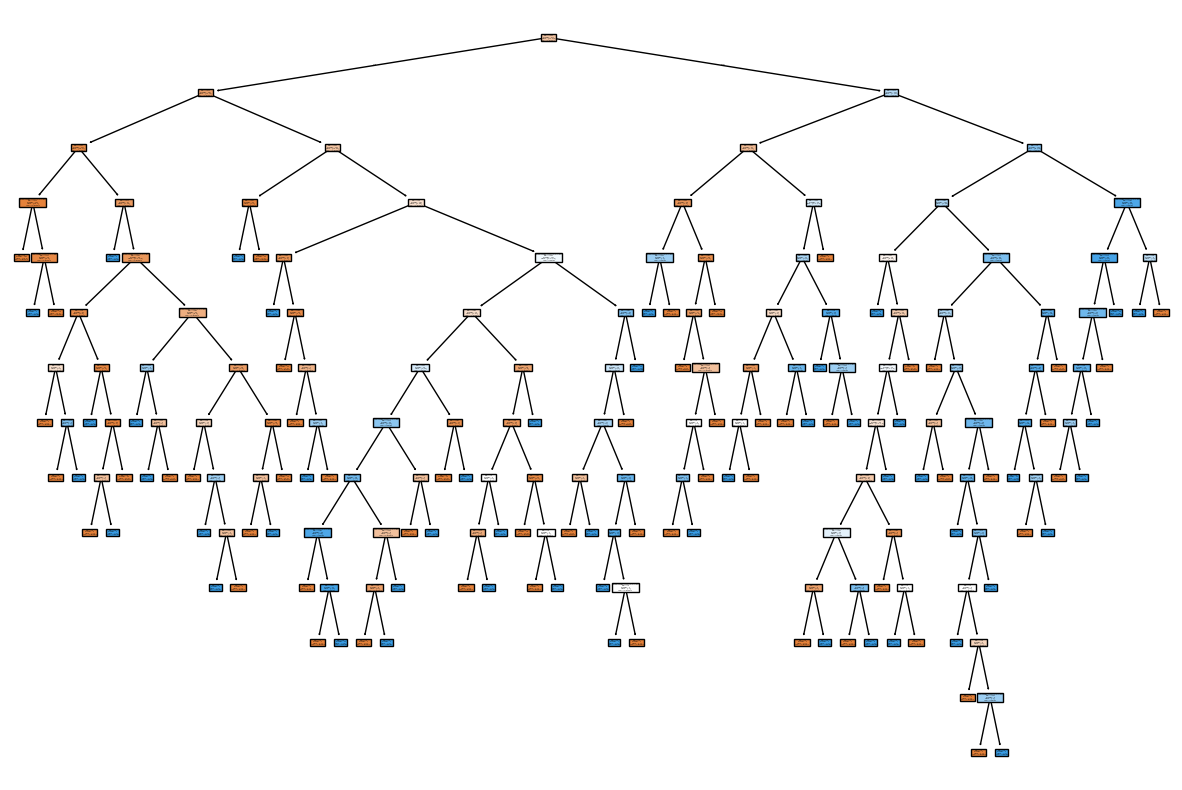

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(modelo, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV

# Definir los valores a probar para cada hiperparámetro
parametros = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

# Crear el modelo base
modelo = DecisionTreeClassifier()

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(modelo, parametros, cv=5)
grid_search.fit(X_train, y_train)

# Mejor configuración encontrada
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [17]:
# Crear el modelo con los hiperparámetros óptimos
modelo_optimo = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2)

# Entrenar el modelo
modelo_optimo.fit(X_train, y_train)

# Evaluar el modelo optimizado
y_pred_optimo = modelo_optimo.predict(X_test)
accuracy_optima = accuracy_score(y_test, y_pred_optimo)

print(f"Precisión del modelo optimizado: {accuracy_optima:.2f}")

Precisión del modelo optimizado: 0.76


In [20]:
import joblib
import os

# Cargar el modelo desde el archivo
modelo_cargado = joblib.load("/workspaces/random_forest_project/models/modelo_decision_tree.pkl")

# Verificar que funciona correctamente
y_pred_nuevo = modelo_cargado.predict(X_test)
print(f"Precisión del modelo cargado: {accuracy_score(y_test, y_pred_nuevo):.2f}")

Precisión del modelo cargado: 0.76


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Crear el modelo con valores iniciales
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Evaluar el modelo
y_pred_rf = modelo_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Precisión inicial del Random Forest: {accuracy_rf:.2f}")

Precisión inicial del Random Forest: 0.77


n_estimators=50, max_depth=3 → Precisión: 0.77
n_estimators=50, max_depth=5 → Precisión: 0.76
n_estimators=50, max_depth=10 → Precisión: 0.75
n_estimators=50, max_depth=None → Precisión: 0.71
n_estimators=100, max_depth=3 → Precisión: 0.77
n_estimators=100, max_depth=5 → Precisión: 0.77
n_estimators=100, max_depth=10 → Precisión: 0.75
n_estimators=100, max_depth=None → Precisión: 0.72
n_estimators=200, max_depth=3 → Precisión: 0.79
n_estimators=200, max_depth=5 → Precisión: 0.76
n_estimators=200, max_depth=10 → Precisión: 0.73
n_estimators=200, max_depth=None → Precisión: 0.73
n_estimators=500, max_depth=3 → Precisión: 0.78
n_estimators=500, max_depth=5 → Precisión: 0.77
n_estimators=500, max_depth=10 → Precisión: 0.73
n_estimators=500, max_depth=None → Precisión: 0.73


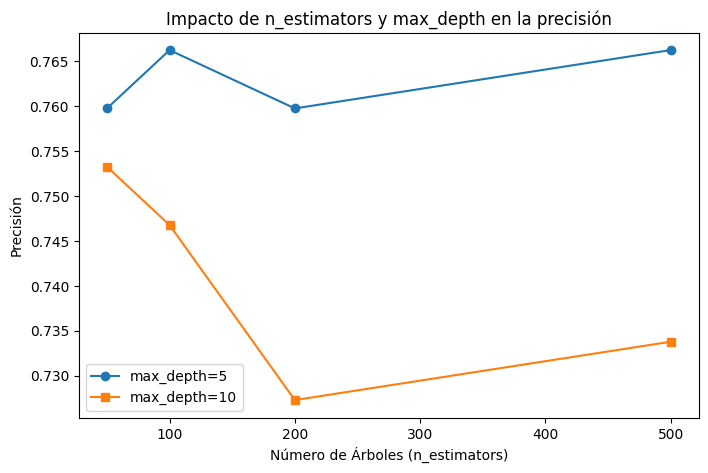

In [25]:

# Valores de hiperparámetros a probar
n_estimators_values = [50, 100, 200, 500]
max_depth_values = [3, 5, 10, None]
accuracy_results = {}

# Pruebas con diferentes hiperparámetros
for n in n_estimators_values:
    for d in max_depth_values:
        modelo_rf_tuned = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        modelo_rf_tuned.fit(X_train, y_train)
        y_pred_tuned = modelo_rf_tuned.predict(X_test)
        acc = accuracy_score(y_test, y_pred_tuned)
        accuracy_results[(n, d)] = acc
        print(f"n_estimators={n}, max_depth={d} → Precisión: {acc:.2f}")

# Graficar resultados
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(n_estimators_values, [accuracy_results[(n, 5)] for n in n_estimators_values], marker='o', label="max_depth=5")
ax.plot(n_estimators_values, [accuracy_results[(n, 10)] for n in n_estimators_values], marker='s', label="max_depth=10")
ax.set_xlabel("Número de Árboles (n_estimators)")
ax.set_ylabel("Precisión")
ax.legend()
plt.title("Impacto de n_estimators y max_depth en la precisión")
plt.show()

In [28]:
modelo_rf_optimo = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42)
modelo_rf_optimo.fit(X_train, y_train)

# Guardar el modelo en "/models/modelo_random_forest.pkl"
joblib.dump(modelo_rf_optimo, "/workspaces/random_forest_project/models/modelo_random_forest.pkl")

print("✅ Modelo guardado exitosamente en models/modelo_random_forest.pkl")


✅ Modelo guardado exitosamente en models/modelo_random_forest.pkl
